# Superstore Exploratory Data Analysis

Our task is to analyze the sales data and 
identify weak areas and opportunities for super store
to boost business growth. By analyzing superstore sales data
we will make recommendations to business questions.

In [37]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Setting dataset equal to a variable
store = pd.read_csv('SampleSuperstore.csv')

In [3]:
#Checking the head of the dataframe
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Check the end of the dataframe
store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
#Check the shape of the dataframe
store.shape

(9994, 13)

In [6]:
#Check the information of the information of the dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#Data Cleaning for missing and duplicate data
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
store.duplicated().sum()

17

In [9]:
#Drop the 17 Duplicated rows
store.drop_duplicates(inplace=True)

In [10]:
#Find tge number of rows and columns
store.shape

(9977, 13)

In [11]:
#Calculate profit Margins
store['Profit Margins%'] = (store.Profit/store.Sales)*100
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margins%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [12]:
#Descriptive statistics
store.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margins%
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


### Which category is best selling and most profitable?

In [45]:
#Groups sales, profit and quantity by category
category_analysis = pd.DataFrame(store.groupby(['Category'])[['Sales','Profit','Quantity']].sum().reset_index())
category_analysis

,Category,Sales,Profit,Quantity
0,Furniture,741306.3133,18421.8137,8020
1,Office Supplies,718735.2440,122364.6608,22861
2,Technology,836154.0330,145454.9481,6939


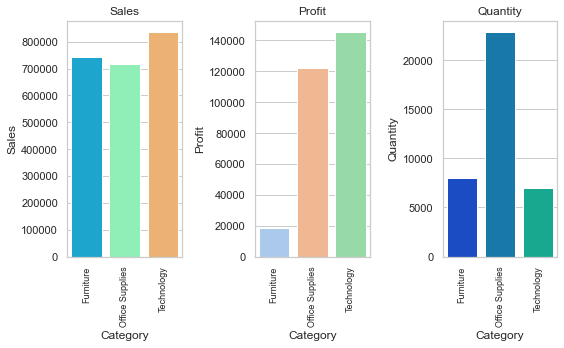

In [14]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

### What are the Best Selling and Most Profitable Sub-Category?

In [44]:
#Groupby subcategory and sort by descending order according to sales
subcat_analysis = pd.DataFrame(store.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
subcat_analysis1 = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False).reset_index())

subcat_analysis1

,Sub-Category,Sales,Profit
0,Phones,330007.0540,44515.7306
1,Chairs,327777.7610,26567.1278
2,Storage,223843.6080,21278.8264
3,Tables,206965.5320,-17725.4811
4,Binders,203409.1690,30228.0003
5,Machines,189238.6310,3384.7569
6,Accessories,167380.3180,41936.6357
7,Copiers,149528.0300,55617.8249
8,Bookcases,114879.9963,-3472.5560
9,Appliances,107532.1610,18138.0054


In [43]:
# Sort by descending order according to profit

subcat_profit = pd.DataFrame(subcat_analysis1.sort_values('Profit', ascending = False).reset_index())

subcat_profit

,Sub-Category,Sales,Profit
0,Copiers,149528.0300,55617.8249
1,Phones,330007.0540,44515.7306
2,Accessories,167380.3180,41936.6357
3,Paper,78224.1420,33944.2395
4,Binders,203409.1690,30228.0003
5,Chairs,327777.7610,26567.1278
6,Storage,223843.6080,21278.8264
7,Appliances,107532.1610,18138.0054
8,Furnishings,91683.0240,13052.7230
9,Envelopes,16476.4020,6964.1767


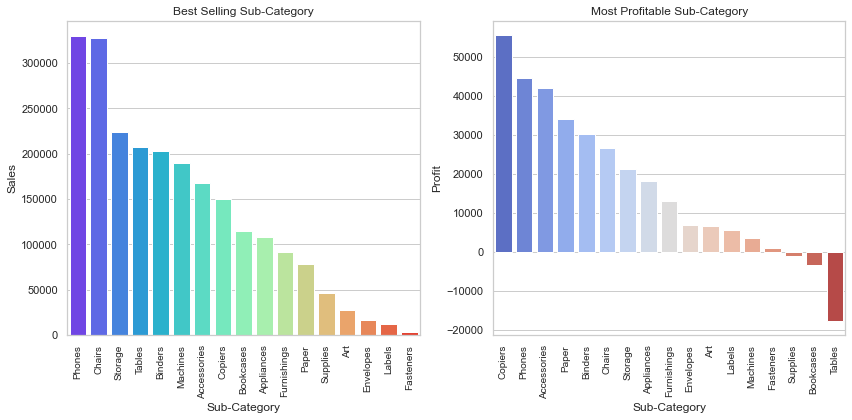

In [29]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_analysis1, x = subcat_analysis1.index, y = subcat_analysis1.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

### Which is the Top Selling Sub-Category?

In [21]:
#Groupby subcategory and sort by descending order according to sales
subcat_analysis3 = pd.DataFrame(store.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))

subcat_analysis3

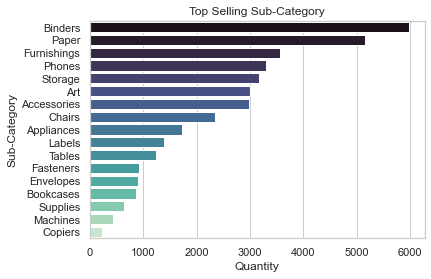

In [20]:
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_analysis3, y = subcat_analysis3.index, x = subcat_analysis3.Quantity, palette = "mako")
plt.title("Top Selling Sub-Category")
plt.show()

### Which Customer Segment is Most Profitable?

In [31]:
#Groups the total of profit by segment
segment_analysis = pd.DataFrame(store.groupby(['Segment'])[['Profit']].sum())

segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


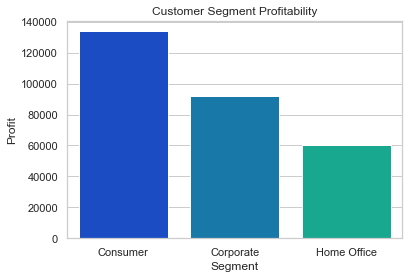

In [35]:
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "winter")
plt.title("Customer Segment Profitability")
plt.show()

### Which is the Preferred Ship Mode?

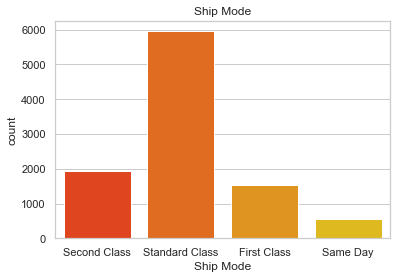

In [40]:
#Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(store['Ship Mode'], palette = "autumn")

plt.title("Ship Mode")

plt.show()

### Which Region is the Most Profitable?

In [42]:
#Group the totatl of profit by region
region_analysis = pd.DataFrame(store.groupby(['Region'])['Profit'].sum().reset_index())

region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


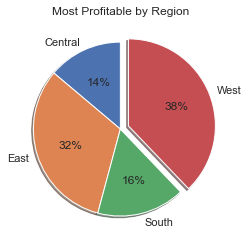

In [46]:
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)

plt.title("Most Profitable by Region")

plt.show()